# Import Library

In [1]:
from numpy import array
from numpy import hstack
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import keras.backend as K
from keras_tqdm import TQDMNotebookCallback
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
from keras.callbacks import History

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Import File

In [2]:
df = pd.read_csv('gold_price_update2.csv')

In [3]:
df

,date,price
0,4-Jan-10,17500
1,5-Jan-10,17650
2,6-Jan-10,17600
3,7-Jan-10,17700
4,8-Jan-10,17600
...,...,...
3892,26-Sep-22,29450
3893,27-Sep-22,29400
3894,28-Sep-22,29400
3895,29-Sep-22,29700


In [4]:
df.columns = ['date', 'price']
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
dataset=df
dataset

,price
date,
2010-01-04,17500
2010-01-05,17650
2010-01-06,17600
2010-01-07,17700
2010-01-08,17600
...,...
2022-09-26,29450
2022-09-27,29400
2022-09-28,29400


Text(0.5, 0, 'Year')

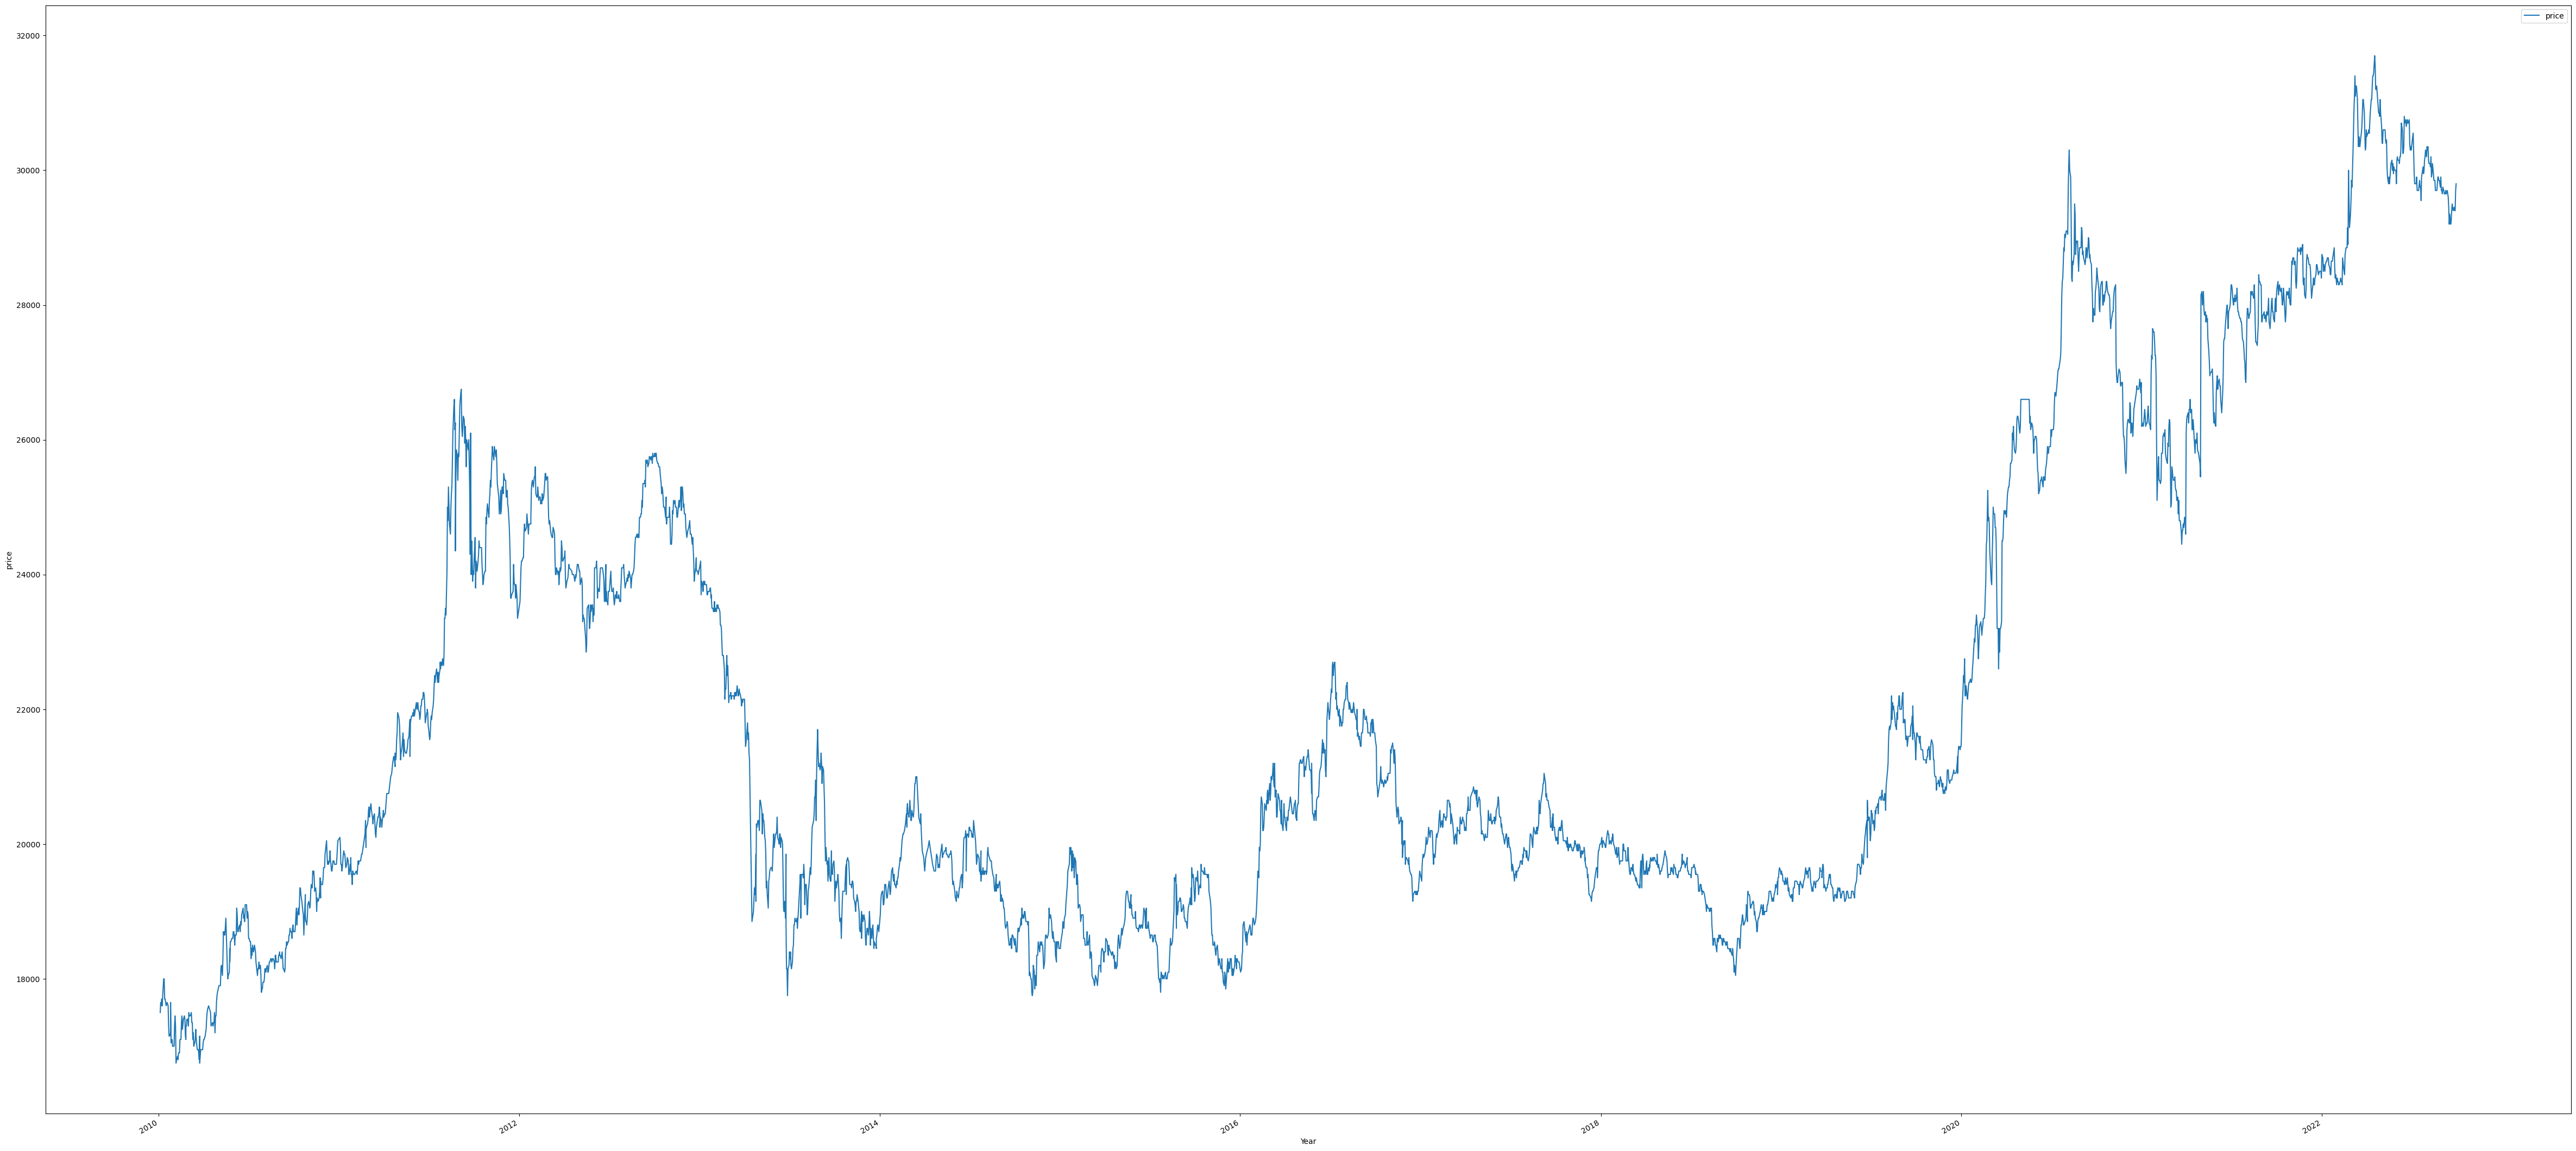

In [5]:
df.plot(figsize=(60,30))
plt.ylabel('price')
plt.xlabel('Year')

In [6]:
dataset=np.array(dataset)
dataset

array([[17500],
       [17650],
       [17600],
       ...,
       [29400],
       [29700],
       [29800]], dtype=int64)

# Data Set 6 วัน

In [7]:
dataset_X,dataset_Y= [],[]
for i in range(6,len(dataset)):
    dataset_X.append(dataset[i-6:i,0])
    dataset_Y.append(dataset[i,0])

dataset_X,dataset_Y=np.array(dataset_X),np.array(dataset_Y)
# Reshape the data 

In [8]:
dataset_X.shape

(3891, 6)

In [9]:
dataset_Y.shape

(3891,)

In [10]:
dataset_X=dataset_X.reshape(3891,6)
dataset_X=pd.DataFrame(dataset_X)

In [11]:
dataset_X.columns = ['1','2','3','4','5','6']

In [12]:
dataset_X

,1,2,3,4,5,6
0,17500,17650,17600,17700,17600,17750
1,17650,17600,17700,17600,17750,18000
2,17600,17700,17600,17750,18000,18000
3,17700,17600,17750,18000,18000,17700
4,17600,17750,18000,18000,17700,17700
...,...,...,...,...,...,...
3886,29200,29250,29400,29500,29450,29400
3887,29250,29400,29500,29450,29400,29450
3888,29400,29500,29450,29400,29450,29400
3889,29500,29450,29400,29450,29400,29400


In [13]:
#สร้าง Dataset_Y
dataset_Y=dataset_Y.reshape(3891,1)

dataset_Y=pd.DataFrame(dataset_Y)

In [14]:

dataset_Y

,0
0,18000
1,18000
2,17700
3,17700
4,17650
...,...
3886,29450
3887,29400
3888,29400
3889,29700


In [15]:
#ทำการแบ่ง Train และ Test 70:30

train_ratio = .7 
train_x = dataset_X[:2723]
train_y =dataset_Y[:2723]
test_x= dataset_X[2723:]
test_y= dataset_Y[2723:]
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((2723, 6), (2723, 1), (1168, 6), (1168, 1))

In [16]:
#ทำการแปลง train_x,train_y,test_x,test_y เป็น array

train_x = np.array(train_x)
train_y =np.array(train_y)
test_x=np.array(test_x)
test_y= np.array(test_y)
train_x=train_x.reshape(2723,6)
train_y=train_y.reshape(2723,1)
test_x=test_x.reshape(1168,6)
test_y=test_y.reshape(1168,1)

In [17]:
#ทำการ Rescale
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(train_x)
scalery = StandardScaler().fit(train_y)
train_x = scalerX.transform(train_x)
train_y = scalery.transform(train_y)
test_x = scalerX.transform(test_x)
test_y = scalery.transform(test_y)


In [18]:
from sklearn.ensemble._forest import RandomForestRegressor
RF_Model = RandomForestRegressor(n_estimators=100, criterion='absolute_error' , max_samples = None,oob_score=True)



In [19]:
train_x=train_x.reshape(2723,6)
train_y=train_y.reshape(-1)
test_x=test_x.reshape(1168,6)
test_y=test_y.reshape(-1)

In [20]:
rgr=RF_Model.fit(train_x,train_y)

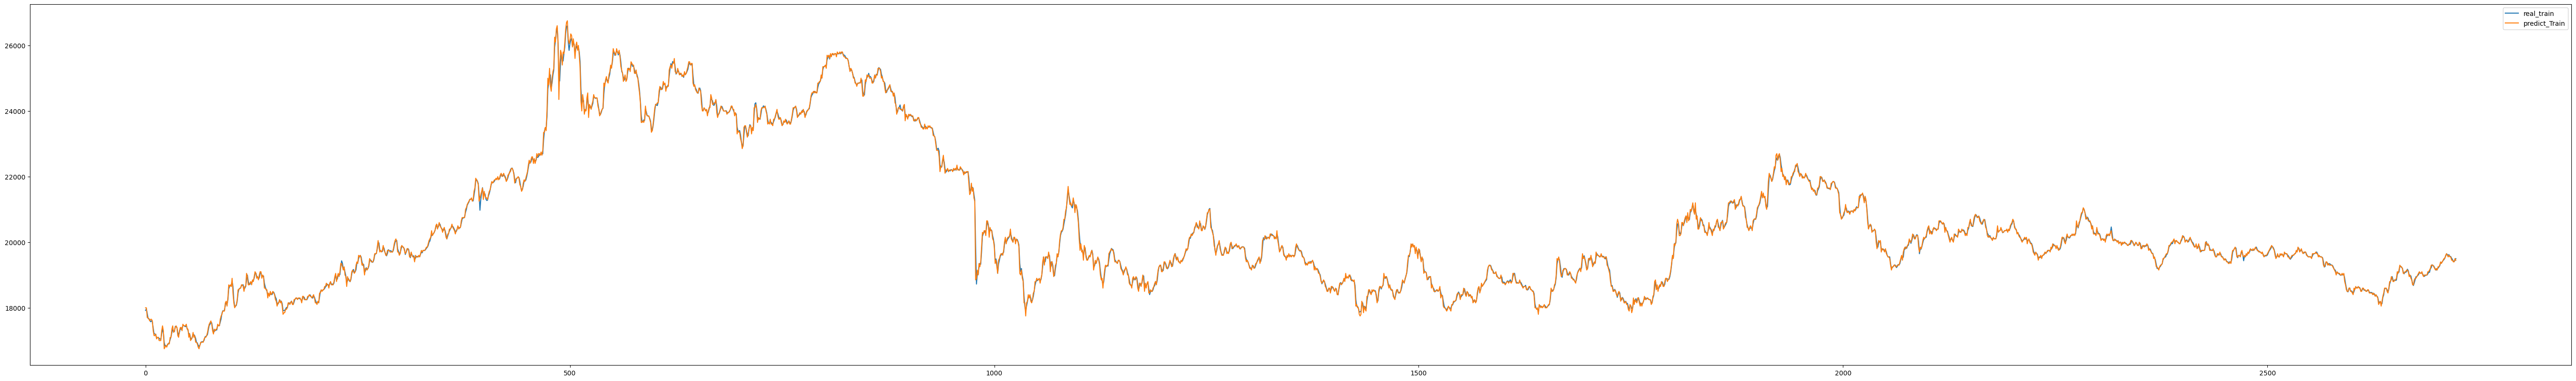

In [22]:
predictrainX = rgr.predict(train_x)
y_trian_predict =predictrainX.reshape(2723,1)
y_pred_train_real=scalery.inverse_transform(y_trian_predict)
train_y_real = scalery.inverse_transform(train_y.reshape(2723,1))

plt.figure(figsize=(70, 10))
plt.plot(y_pred_train_real)
plt.plot(train_y_real)
plt.legend(['real_train', 'predict_Train',])

In [30]:
df2=pd.DataFrame(y_pred_train_real)
df2.to_csv('y_randomforest_train.csv')

df3=pd.DataFrame(y_pred_rgr_real)
df3.to_csv('y_randomforest_tes.csv')


In [23]:
y_pred_rgr = rgr.predict(test_x)
y_pred_rgr =y_pred_rgr.reshape(1168,1)

In [24]:

y_pred_rgr_real=scalery.inverse_transform(y_pred_rgr)

In [25]:
test_y_real = scalery.inverse_transform(test_y.reshape(1168,1))




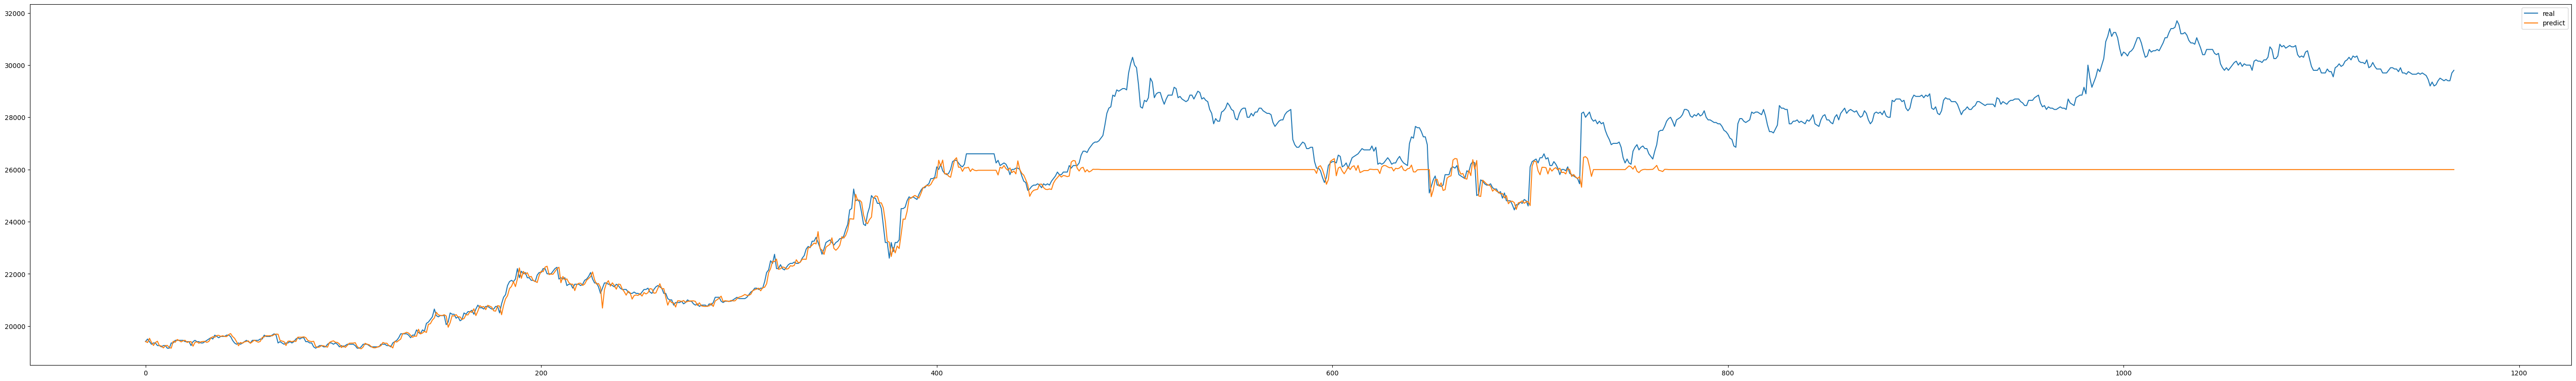

In [29]:

plt.figure(figsize=(70, 10))
plt.plot(test_y_real)
plt.plot(y_pred_rgr_real)
plt.plot( len(test_y_real),26000)
plt.legend(['real', 'predict',])

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mean_absolute_error(test_y_real,y_pred_rgr_real)

In [ ]:
np.sqrt(mean_squared_error(test_y_real,y_pred_rgr_real))

In [ ]:
r2_score(test_y_real,y_pred_rgr_real)

In [ ]:
mape = np.mean(np.abs((test_y_real - y_pred_rgr_real)/test_y_real))*100

In [ ]:
mape

In [ ]:
mape